# Shruti Santosh Chavan , BE(IT)

In [1]:
# Build the Image classification model by dividing the model into following 4 stages:
# a. Loading and preprocessing the image data
# b. Defining the model’s architecture
# c . Training the model
# d. Estimating the model’s performance

In [2]:
!pip install --upgrade pip
!pip uninstall -y numpy h5py tensorflow keras
!pip install numpy==1.26.4 h5py==3.10.0 tensorflow==2.16.1 keras==3.3.3

Defaulting to user installation because normal site-packages is not writeable
  Using cached pip-25.2-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.2-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:


ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\shutil.py", line 847, in move
    os.rename(src, real_dst)
PermissionError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy-1.26.4.dist-info\\' -> 'C:\\Users\\GAMER\\AppData\\Local\\Temp\\pip-uninstall-19obpqxk'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
             ^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\commands\uninstall.py", line 106, in run
    uninstall_pathset = req.uninstall(
                        ^^^^^^^^^^^^^^
  File "C:\ProgramData\ana

Defaulting to user installation because normal site-packages is not writeable
  Using cached keras-3.3.3-py3-none-any.whl.metadata (5.7 kB)
Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.11.3
    Uninstalling keras-3.11.3:
      Successfully uninstalled keras-3.11.3


In [3]:
!pip uninstall -y keras keras-nightly keras-preprocessing keras-vis
!pip uninstall -y tensorflow tensorflow-intel tensorflow-gpu

Found existing installation: keras 3.3.3
Uninstalling keras-3.3.3:
  Successfully uninstalled keras-3.3.3


Found existing installation: tensorflow 2.16.1
Uninstalling tensorflow-2.16.1:
  Successfully uninstalled tensorflow-2.16.1
Found existing installation: tensorflow-intel 2.16.1
Uninstalling tensorflow-intel-2.16.1:
  Successfully uninstalled tensorflow-intel-2.16.1


In [4]:
!pip install tensorflow==2.16.1

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.16.1-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
Using cached tensorflow-2.16.1-cp312-cp312-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.16.1-cp312-cp312-win_amd64.whl (377.1 MB)
Using cached keras-3.11.3-py3-none-any.whl (1.4 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
!pip show tensorflow

Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\GAMER\AppData\Roaming\Python\Python312\site-packages
Requires: tensorflow-intel
Required-by: 


In [6]:
import sys
print(sys.executable)

C:\ProgramData\anaconda3\python.exe


In [7]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)

TensorFlow version: 2.16.1
Keras version: 3.11.3


In [9]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD


# a. Loading and preprocessing the image data

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

print("Data type of x_train=",x_train.dtype)

x_train=x_train.astype('float32') / 255
x_test=x_test.astype('float32') / 255

print("Data type of x_train after converting into vector=",x_train.dtype)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Data type of x_train= uint8
Data type of x_train after converting into vector= float32


In [11]:
x_train[0].min(),x_train[0].max()

(0.0, 1.0)

In [12]:
#normalizing the RGB code by dividing the max RGB value

x_train=(x_train)/(255)
x_test=(x_test)/(255)

print("shape of training data",x_train.shape)
print("shape of testing data",x_test.shape)
x_train[0].min(),x_train[0].max()

shape of training data (60000, 28, 28, 1)
shape of testing data (10000, 28, 28, 1)


(0.0, 0.003921569)

# B.Define the model architecture

In [13]:

model = Sequential([
    layers.Conv2D(32,(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

C:\Users\GAMER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

# C.Training the Model

In [14]:
optimizer=SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(x_train, y_train,  validation_data=(x_test, y_test), epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.1094 - loss: 2.3020 - val_accuracy: 0.1135 - val_loss: 2.3017
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.1106 - loss: 2.3018 - val_accuracy: 0.1135 - val_loss: 2.3014
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.1116 - loss: 2.3019 - val_accuracy: 0.1028 - val_loss: 2.3021


# D Estimating the Model’s Performance

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1028 - loss: 2.3021
Test loss: 2.302088975906372
Test accuracy: 0.10279999673366547


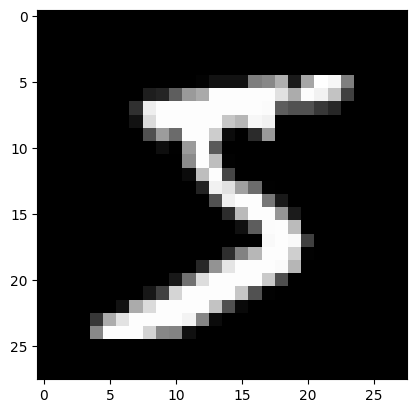

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
pridicted class= 7


In [16]:
# Evaluate the model
score= model.evaluate(x_test, y_test)
print(f'Test loss:',score[0])
print(f'Test accuracy:',score[1])

#showing the image position from the dataset
image=x_train[0]
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

# Predicting the image value
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])  # Reshape for model input
pridicted_class=model.predict(image)
print("pridicted class=" ,np.argmax(pridicted_class))





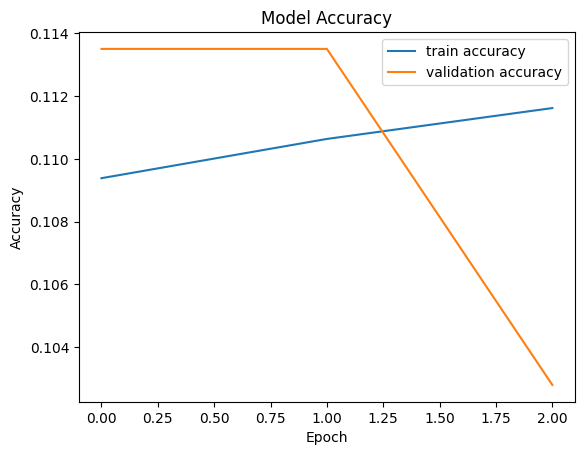

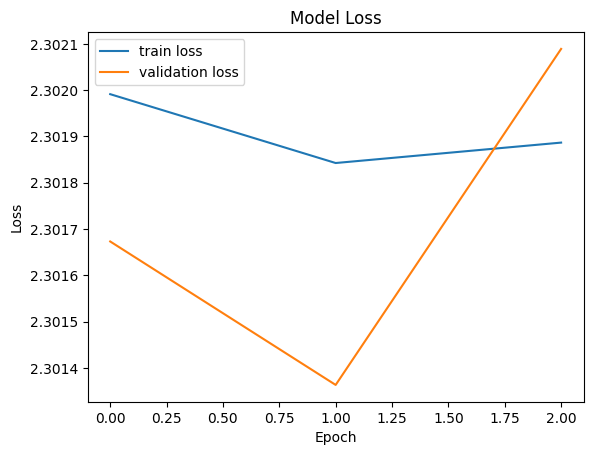

In [17]:
# Optional: Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()